In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Read CSV file
seattle_file = "Resources/Seattle_Crime_Data.csv"
seattle_df = pd.read_csv(seattle_file, encoding= "unicode_escape")

In [3]:
# Evaluate data
seattle_df.head()
seattle_df = seattle_df.dropna()
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109969 entries, 0 to 109968
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ï»¿Date       109969 non-null  object
 1   Year          109969 non-null  int64 
 2   Month         109969 non-null  object
 3   City Name     109969 non-null  object
 4   Offense Type  109969 non-null  object
 5   isViolent     109969 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.9+ MB


In [4]:
# Convert reported data to pandas datetime64 type and use DatetimeIndex to add year and month data
# NOTE:  First convert date from an object to datetime64 use info() method to confirm panda data type for Reporte Dates
seattle_df["Date"] = pd.to_datetime(seattle_df["ï»¿Date"])
seattle_df["Year"] = pd.DatetimeIndex(seattle_df["ï»¿Date"]).year
seattle_df["Month"] = pd.DatetimeIndex(seattle_df["ï»¿Date"]).month
seattle_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 109969 entries, 0 to 109968
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ï»¿Date       109969 non-null  object        
 1   Year          109969 non-null  int64         
 2   Month         109969 non-null  int64         
 3   City Name     109969 non-null  object        
 4   Offense Type  109969 non-null  object        
 5   isViolent     109969 non-null  object        
 6   Date          109969 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 6.7+ MB


In [5]:
# Review offense types and count
seattle_df["Offense Type"].value_counts()
seattle_df.head()

,ï»¿Date,Year,Month,City Name,Offense Type,isViolent,Date
0,1/1/2019,2019,1,Seattle,ASSAULT OFFENSES,Violent,2019-01-01
1,1/1/2019,2019,1,Seattle,ROBBERY,Violent,2019-01-01
2,1/1/2019,2019,1,Seattle,ASSAULT OFFENSES,Violent,2019-01-01
3,1/1/2019,2019,1,Seattle,ARSON,Non-violent,2019-01-01
4,1/1/2019,2019,1,Seattle,BURGLARY/BREAKING&ENTERING,Non-violent,2019-01-01


In [6]:
# Group data by offense type and organize 
seattle_df_grouped = seattle_df.groupby("Offense Type").count()
seattle_df_grouped = seattle_df.sort_values("Date", ascending=False)
seattle_df_grouped.head(10)


,ï»¿Date,Year,Month,City Name,Offense Type,isViolent,Date
109968,6/30/2020,2020,6,Seattle,BURGLARY/BREAKING&ENTERING,Non-violent,2020-06-30
109865,6/30/2020,2020,6,Seattle,LARCENY-THEFT,Non-violent,2020-06-30
109863,6/30/2020,2020,6,Seattle,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Non-violent,2020-06-30
109862,6/30/2020,2020,6,Seattle,ASSAULT OFFENSES,Violent,2020-06-30
109861,6/30/2020,2020,6,Seattle,TRESPASS OF REAL PROPERTY,Non-violent,2020-06-30
109860,6/30/2020,2020,6,Seattle,FRAUD OFFENSES,Non-violent,2020-06-30
109859,6/30/2020,2020,6,Seattle,BURGLARY/BREAKING&ENTERING,Non-violent,2020-06-30
109858,6/30/2020,2020,6,Seattle,ASSAULT OFFENSES,Violent,2020-06-30
109857,6/30/2020,2020,6,Seattle,ASSAULT OFFENSES,Violent,2020-06-30
109856,6/30/2020,2020,6,Seattle,ASSAULT OFFENSES,Violent,2020-06-30


In [7]:
# Create sunnnary tabel of Denver Crime Statistics
seattle_summary_df = seattle_df.groupby("Offense Type").count()
seattle_summary_df = seattle_summary_df.sort_values(by=["isViolent"], ascending=False)
seattle_summary_df = seattle_summary_df["isViolent"]

pd.DataFrame({"# Reported Offenses": seattle_summary_df}).head(10)


,# Reported Offenses
Offense Type,
LARCENY-THEFT,36454
ASSAULT OFFENSES,16170
FRAUD OFFENSES,13131
BURGLARY/BREAKING&ENTERING,12258
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,8773
MOTOR VEHICLE THEFT,5978
TRESPASS OF REAL PROPERTY,5549
DRUG/NARCOTIC OFFENSES,2288
ROBBERY,2228


In [8]:
# Pie chart data

# Violent vs. Non_Violent Crime
violent_crimes = seattle_df["isViolent"].loc[seattle_df["isViolent"] == "Violent"].count()
non_violent_crimes = seattle_df["isViolent"].loc[seattle_df["isViolent"] == "Non-violent"].count()

# Top 10 LA Crime dataframes
larc_df = seattle_df.loc[seattle_df["Offense Type"] == "LARCENY-THEFT"]
assault_df = seattle_df.loc[seattle_df["Offense Type"] == "ASSAULT OFFENSES"]
fraud_df = seattle_df.loc[seattle_df["Offense Type"] == "FRAUD OFFENSES"]
burg_df = seattle_df.loc[seattle_df["Offense Type"] == "BURGLARY/BREAKING&ENTERING"]
vandalism_df = seattle_df.loc[seattle_df["Offense Type"] == "DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY"]
mvtheft_df = seattle_df.loc[seattle_df["Offense Type"] == "MOTOR VEHICLE THEFT"]
drug_df = seattle_df.loc[seattle_df["Offense Type"] == "DRUG/NARCOTIC OFFENSES"]
tresspass_df = seattle_df.loc[seattle_df["Offense Type"] == "TRESPASS OF REAL PROPERTY"]
robbery_df = seattle_df.loc[seattle_df["Offense Type"] == "ROBBERY"]
dui_df = seattle_df.loc[seattle_df["Offense Type"] == "DRIVING UNDER THE INFLUENCE"]

# Top 10 Crime data for pie chart
Total = seattle_df["Offense Type"].count()
larc = larc_df["Offense Type"].count()
assault = assault_df["Offense Type"].count()
fraud = fraud_df["Offense Type"].count()
burg = burg_df["Offense Type"].count()
vandalism = vandalism_df["Offense Type"].count()
mvtheft = mvtheft_df["Offense Type"].count()
drug = drug_df["Offense Type"].count()
tresspass = tresspass_df["Offense Type"].count()
robbery = robbery_df["Offense Type"].count()
dui = dui_df["Offense Type"].count()
OtherOther = (Total - larc - assault - fraud - burg - vandalism - mvtheft - drug - 
              tresspass - robbery - dui)

print(non_violent_crimes, violent_crimes)
print(larc,assault,fraud,burg,vandalism,mvtheft,drug, tresspass, robbery, dui)

OtherOther
Total


90493 19476
36454 16170 13131 12258 8773 5978 2288 5549 2228 2024


109969

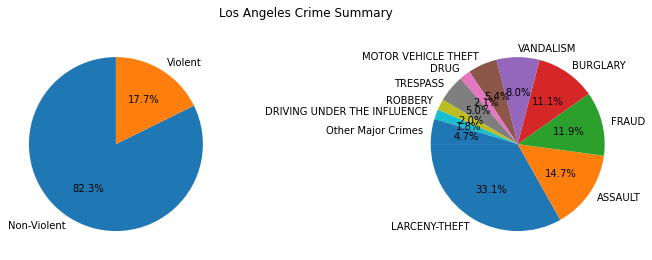

In [9]:
# Plot pie chart of crime types

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Los Angeles Crime Summary")

# First Plot
values1 = [non_violent_crimes, violent_crimes]
labels1 = ["Non-Violent", "Violent"]
ax1.pie(values1, labels=labels1, autopct="%1.1f%%", shadow=False, startangle=90)

# Second Plot
values2 = [larc,assault,fraud,burg,vandalism,mvtheft,drug, tresspass, robbery, dui, OtherOther]
labels2 = ["LARCENY-THEFT", "ASSAULT", "FRAUD", "BURGLARY", "VANDALISM", 
           "MOTOR VEHICLE THEFT", "DRUG", "TRESPASS", "ROBBERY", "DRIVING UNDER THE INFLUENCE", 
           "Other Major Crimes"]
ax2.pie(values2, labels=labels2, autopct="%1.1f%%", shadow=False, startangle=180)

# Plot
plt.subplots_adjust(wspace=.5)
plt.savefig("Output Folder/fig1.png", dpi=300)   
plt.show()


In [10]:
# Group data into Violent / Non-violent categories, trends by month 
seattle_trend_df = seattle_df.groupby(["isViolent", "Year", "Month"]).count()
# dtrend_df = dtrend_df.sort_values(by=["Year", "Month"], ascending=True)dddd
seattle_trend_df.head()


ï»¿Date  City Name  Offense Type  Date
isViolent   Year Month                                        
Non-violent 2019 1         5195       5195          5195  5195
                 2         3771       3771          3771  3771
                 3         4685       4685          4685  4685
                 4         4737       4737          4737  4737
                 5         4561       4561          4561  4561

In [11]:
# Break trend data into violent and non-violent data frames and sort by Year and Month
# Nonviolent data
nonviolent_df = seattle_trend_df.loc["Non-violent"]
nonviolent_df = nonviolent_df.sort_values(by=["Year", "Month"], ascending=True)

# Violent data
violent_df = seattle_trend_df.loc["Violent"]
violent_df = violent_df.sort_values(by=["Year", "Month"], ascending=True)


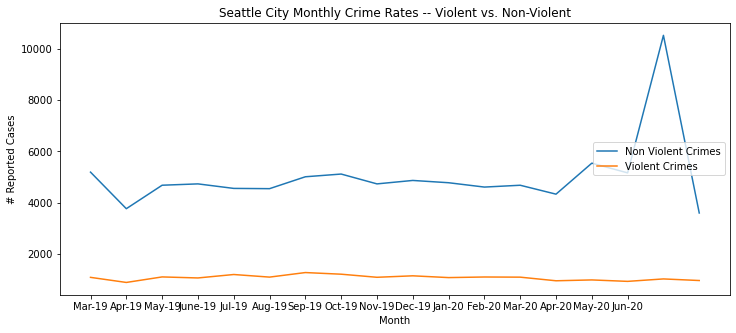

In [12]:
# Generate line plot as figure
# Step 1: Configure chart, xticks, and labels/titles
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("Seattle City Monthly Crime Rates -- Violent vs. Non-Violent")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(nonviolent_df["Offense Type"]), label="Non Violent Crimes")
plt.plot(list(violent_df["Offense Type"]), label="Violent Crimes")
plt.legend(loc="center right")
plt.savefig("Output Folder/fig2.png", dpi=300) 
plt.show()


In [13]:
# Summary look at Violent crimes:
seattleVioSum_df = seattle_df.loc[seattle_df["isViolent"] == "Violent"]
#DVioSum_df.groupby("Offense").count()
seattleVioSum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19476 entries, 0 to 109955
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ï»¿Date       19476 non-null  object        
 1   Year          19476 non-null  int64         
 2   Month         19476 non-null  int64         
 3   City Name     19476 non-null  object        
 4   Offense Type  19476 non-null  object        
 5   isViolent     19476 non-null  object        
 6   Date          19476 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.2+ MB


In [14]:
# Violent crime trends
VTrend_df = seattleVioSum_df.groupby(["Offense Type", "Year", "Month"]).count()
VTrend_df.head()

ï»¿Date  City Name  isViolent  Date
Offense Type     Year Month                                     
ASSAULT OFFENSES 2019 1          909        909        909   909
                      2          743        743        743   743
                      3          935        935        935   935
                      4          885        885        885   885
                      5         1020       1020       1020  1020

In [15]:
# Create violent crime plot data
#AggAssault_df = VTrend_df.loc["aggravated-assault"]
#SexAssault_df = VTrend_df.loc["sexual-assault"]
#OtherAssault_df = VTrend_df.loc["other-crimes-against-persons"]
#Murder_df = VTrend_df.loc["murder"]

#AggAssault = AggAssault_df["Is Violent"]
#SexAssault = SexAssault_df["Is Violent"]
#OtherAssault = OtherAssault_df["Is Violent"]
#Murder = Murder_df["Is Violent"]


In [16]:
# Plot violent crime trends
# Step 1: Configure chart, xticks, and labels/titles
#plt.figure(figsize=(12, 5))
#plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
#                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
#plt.title("Denver City Violent Crime Trends")
#plt.xlabel("Month")
#plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
#plt.plot(list(AggAssault), label="Aggrevated Assault")
#plt.plot(list(SexAssault), label="Sexual Assault")
#plt.plot(list(OtherAssault), label="Other Crimes Against Persons")
#plt.plot(list(Murder), label="Murder")
#plt.legend(loc="center left")
#plt.savefig("Output Folder/fig3.png", dpi=300) 
#plt.show()